In [1]:

###Hover Didn't work here so check VisualizingTopicsGuidedLda.py ################
import numpy as np
import guidedlda
from sklearn.feature_extraction.text import CountVectorizer

docs = []
with open('/Users/shrey/AnacondaProjects/Application_reviews/Experiments/PilotRandom/CleanedData/a2.txt','r') as tfile:
    for line in tfile:
        line = line.replace("\n","")
        line = line.replace("app","")
        docs.append(line)
        


n_topics = 5 # number of topics
n_iter = 500 # number of iterations

cvectorizer = CountVectorizer(min_df=5, stop_words='english')
X = cvectorizer.fit_transform(docs)
vocab = cvectorizer.get_feature_names()
#X = guidedlda.datasets.load_data(guidedlda.datasets.NYT)
#vocab = guidedlda.datasets.load_vocab(guidedlda.datasets.NYT)
word2id = dict((v, idx) for idx, v in enumerate(vocab))

print(X.shape)
#print (vocab)
#print(X.sum())
# Normal LDA without seeding


(10055, 2172)


In [2]:

# Guided LDA with seed topics.
seed_topic_list = [['ui','interface','visual','look'],
                   ['privacy','safe','information','login','password'],
                   ['quality','stable','speed','memory']]
        

model = guidedlda.GuidedLDA(n_topics=3, n_iter=150, random_state=7, refresh=20)

seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

X_topics = model.fit_transform(X, seed_topics=seed_topics, seed_confidence=0.15)


n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))


INFO:guidedlda:n_documents: 10055
INFO:guidedlda:vocab_size: 2172
INFO:guidedlda:n_words: 97324
INFO:guidedlda:n_topics: 3
INFO:guidedlda:n_iter: 150
INFO:guidedlda:<0> log likelihood: -838984
INFO:guidedlda:<20> log likelihood: -666310
INFO:guidedlda:<40> log likelihood: -660523
INFO:guidedlda:<60> log likelihood: -656761
INFO:guidedlda:<80> log likelihood: -653074
INFO:guidedlda:<100> log likelihood: -649669
INFO:guidedlda:<120> log likelihood: -646180
INFO:guidedlda:<140> log likelihood: -644070
INFO:guidedlda:<149> log likelihood: -643261


Topic 0: great love like good music just use awesome best new
Topic 1: great love easy use chase app banking bank best good
Topic 2: great weather love update good new use like version just


In [4]:
get_ipython().magic('pylab inline')

_lda_keys = []
for i in range(X_topics.shape[0]):
    _lda_keys.append(X_topics[i].argmax())

    

Populating the interactive namespace from numpy and matplotlib


In [5]:
from sklearn.manifold import TSNE         
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(X_topics)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10055 samples in 0.006s...
[t-SNE] Computed neighbors for 10055 samples in 0.125s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10055
[t-SNE] Computed conditional probabilities for sample 2000 / 10055
[t-SNE] Computed conditional probabilities for sample 3000 / 10055
[t-SNE] Computed conditional probabilities for sample 4000 / 10055
[t-SNE] Computed conditional probabilities for sample 5000 / 10055
[t-SNE] Computed conditional probabilities for sample 6000 / 10055
[t-SNE] Computed conditional probabilities for sample 7000 / 10055
[t-SNE] Computed conditional probabilities for sample 8000 / 10055
[t-SNE] Computed conditional probabilities for sample 9000 / 10055
[t-SNE] Computed conditional probabilities for sample 10000 / 10055
[t-SNE] Computed conditional probabilities for sample 10055 / 10055
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 22.929371
[t-SNE] Err

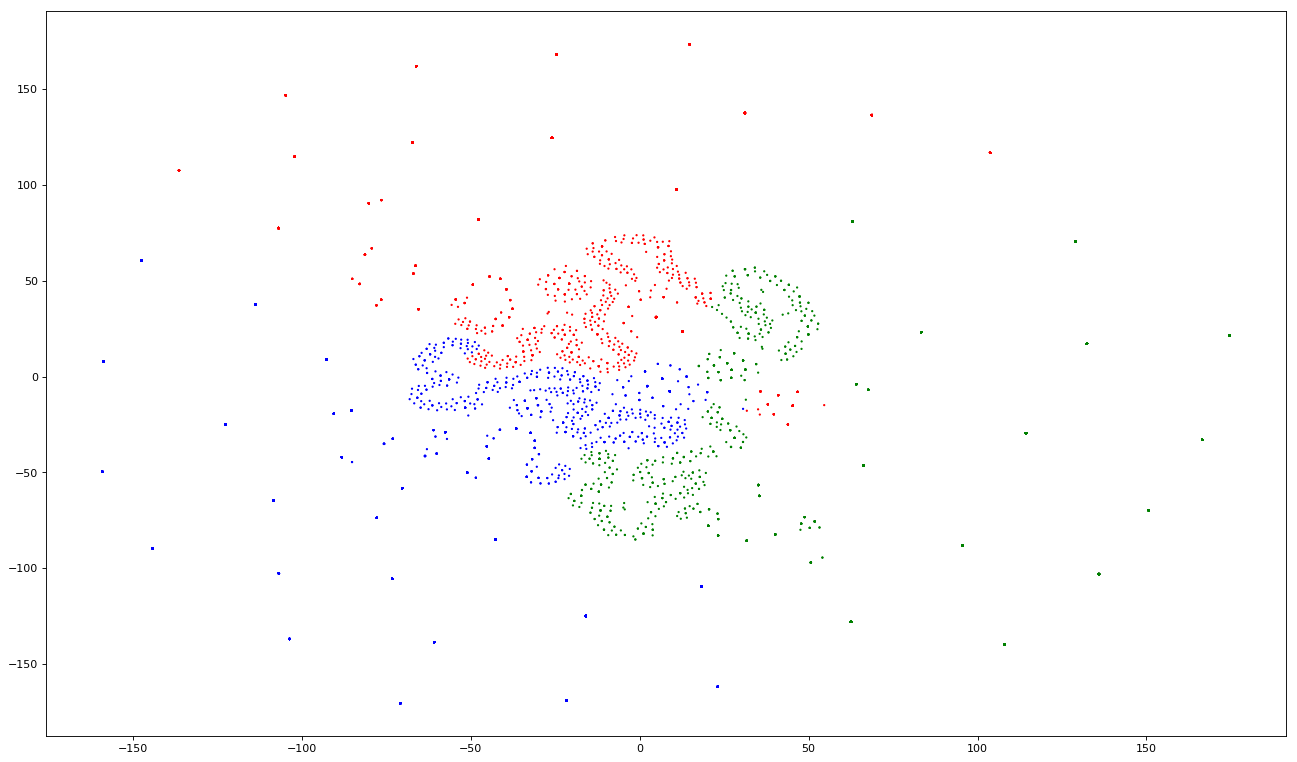

In [9]:
import matplotlib.pyplot as plt
color = []
for i in _lda_keys:
    if i == 0:
        color.append("red")
    elif i == 1:
        color.append("green")
    else:
        color.append("blue")
        
fig = plt.figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
sc = plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=color,s=1)
        
annot = plt.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([docs[n] for n in ind["ind"]]))
    annot.set_text(text)
    #annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    print("hello")
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()



In [ ]:
ann = {}
for cou, i in enumerate(color):
    if i not in ann:
        ann[i] = cou
        
l = [0 for x in range(50)]
for i in ann:
    l[i] = ann[i]
print(l)   

for i in range(50):
    terms = lda.get_topic_terms(i)
    words = [j[0] for j in sorted(terms,key=lambda x: x[1])][:5]
    s = ""
    for k in words:
        s = s + " " + dictionary[k]
    #print(s)
    annotate(s, xy=(tsne_lda[l[i]][0], tsne_lda[l[i]][1]))
    
scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=color,s=1)